Many times, when we plot a map with a grid of dots on it, we want to mask the dots in the water. For example, when we plot some dots represent houses on the map, we may don't want to have them in the water. There are many ways you can avoid that, but today I will show you the way I always use by using Basemap in Python. 

In [2]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

%matplotlib inline

## Define a function to plot a list of lat/lon on map

In [22]:
def plot_on_map(lons_1d, lats_1d, llat, ulat, llon, ulon):
    plt.figure(figsize=(10,10))
    m = Basemap(projection='merc', lon_0=-125.36929, lat_0=38.3215, 
            llcrnrlon=llon,llcrnrlat=llat- 0.01,urcrnrlon=ulon,urcrnrlat=ulat + 0.01,resolution='h')
    m.drawcoastlines()
    m.drawmapboundary()

    m.drawparallels(np.arange(llat, ulat + 0.01, (ulat - llat)/2.), labels=[1,0,0,0], linewidth=0.1, fmt='%.1f')
    m.drawmeridians(np.arange(llon, ulon + 0.01, (ulon - llon)/2.), labels=[0,0,0,1], linewidth=0.1, fmt='%.1f') 
        
    x_0, y_0 = m(lons_1d, lats_1d)
    m.plot(x_0, y_0, 'bo', markersize=10) 

    m.fillcontinents()
    
    plt.show()

## Generate a grid of data

Let's first generate a grid of dots that cover the Bay Aera. We can see the dots we generated are evenly distributed, no matter whether it is in the water or not. 

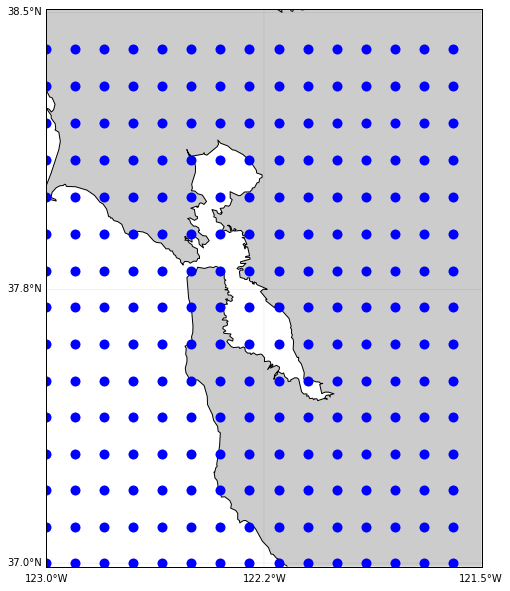

In [7]:
llat = 37.0
ulat = 38.5
llon = -123
ulon = -121.5

lats = np.arange(llat, ulat, 0.1)
lons = np.arange(llon, ulon, 0.1)
lons, lats = np.meshgrid(lons, lats)

# flatten the locations
lons_1d = lons.flatten()
lats_1d = lats.flatten()

plot_on_map(lons_1d, lats_1d, llat, ulat, llon, ulon)

## Mask the dots in water

In Basemap, there is a function called **in_land** for the map object can be used for our purpose. But you need specify the resolution to be 'f' to get everything we need, essentially, it gets all the costline and decide whether the dots are in water or not. Note that, you can not specify a region limit, otherwise, this function will not work. As we cannot specify a small region, it will take some time to run the following code to get the mask. 

In [8]:
# Note this will take a while, therefore, don't run this often :-)
# get the costline and everything using 'f' as resolution, this is also requires a lot of time
m = Basemap(projection='merc', resolution='f')

x_0, y_0 = m(lons_1d, lats_1d)

# get the mask for the ocean or not
in_land = [m.is_land(x, y) for x, y in zip(x_0, y_0)]

lons_1d = lons_1d[in_land]
lats_1d = lats_1d[in_land]

## Plot the data on a map

We can see all the dots in the ocean and the bay is gone now.

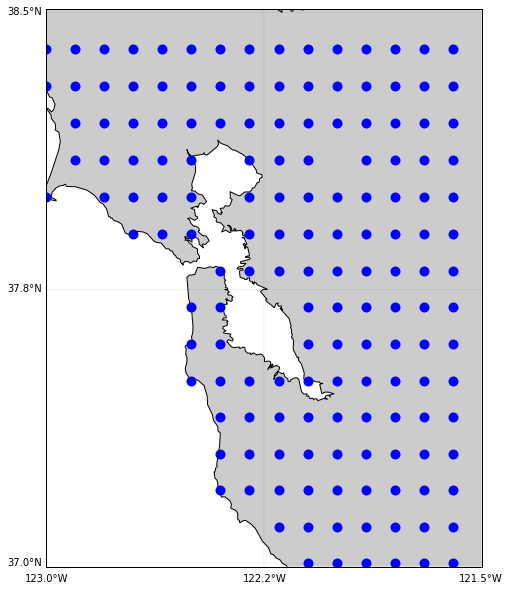

In [23]:
plot_on_map(lons_1d, lats_1d, llat, ulat, llon, ulon)